In [2749]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2750]:
dfr=pd.read_csv('tempSiteRatings.csv')
dfd=pd.read_csv('tempUrlMetrics.csv')

In [2751]:
#print(dfd['slno'].values==dfr['id'].values)
dfd['rating']=dfr['rating']
dfd.to_csv('data.csv')

In [2752]:
data=pd.read_csv('data.csv')

In [2753]:
data.drop(['Unnamed: 0'],1, inplace=True)
def changeColName(data):
    try:
        columns=['word_count','body_text_percent','emphasized_text_percent','text_position_changes','text_cluster_count','link_count','page_size','graphic_percent','graphic_count','colour_count','font_count','colourfulness','visual_complexity','rating']
        data.columns=columns
    except:
        columns=['word_count','body_text_percent','emphasized_text_percent','text_position_changes','text_cluster_count','link_count','page_size','graphic_percent','graphic_count','colour_count','font_count','colourfulness','visual_complexity']
        data.columns=columns
    return data

In [2754]:
def dropMetrics(data):
    try:
        data.drop(['id','url'],1, inplace=True)#,'p1','p2','p4','p6','p7','p10','p11','p12','p13'
    except:
        data.drop(['slno','url'],1, inplace=True)
    return data

In [2755]:
def stdNormal(data,mean,std):
    x = data.values #returns a numpy array
    columns=data.columns
    x_scaled=(x-mean)/std
    data=pd.DataFrame(x_scaled,columns=columns)
    return data

In [2756]:
def catCol(data,col):
    data[col+'_high']=np.zeros(data[col].shape)
    data[col+'_avg']=np.ones(data[col].shape)
    data[col+'_low']=np.zeros(data[col].shape)

    data[col+'_high'][np.where(data[col]>.431)[0]]=1.0
    data[col+'_avg'][np.where(data[col]>.431)[0]]=0.0
    data[col+'_avg'][np.where(data[col]<-.431)[0]]=0.0
    data[col+'_low'][np.where(data[col]<-.431)[0]]=1.0
    data.drop([col],1,inplace=True)
    return data

In [2757]:
def catColPdf(data,col):
    import scipy.stats
    
    mean_high=np.mean(data[col][np.where(data[col]>.431)[0]])
    std_high=np.std(data[col][np.where(data[col]>.431)[0]])


    mean_avg=np.mean(data[col][np.where(abs(data[col])<.431)[0]])
    std_avg=np.std(data[col][np.where(abs(data[col])<.431)[0]])

    mean_low=np.mean(data[col][np.where(data[col]<-.431)[0]])
    std_low=np.std(data[col][np.where(data[col]<-.431)[0]])

    data[col+'_high']=scipy.stats.norm(mean_high,std_high).pdf(data[col].values)
    data[col+'_avg']=scipy.stats.norm(mean_avg,std_avg).pdf(data[col].values)
    data[col+'_low']=scipy.stats.norm(mean_low,std_low).pdf(data[col].values)
    
    data.drop([col],1,inplace=True)
    
    return data


In [2758]:
def preProcess(data,mean,std):
    data=changeColName(data)
    try:
        rating=data['rating']
        data.drop(['rating'],1,inplace=True)
    except:
        pass
    data=stdNormal(data,mean,std)
    data=catCol(data,'word_count')
    data=catCol(data,'page_size') 
    data=catCol(data,'colourfulness') 
    data=catCol(data,'visual_complexity') 
    try:
        data['rating']=rating
    except:
        pass
    return data

In [2759]:
data=dropMetrics(data)

In [2760]:
mean=np.mean(data.values[:,:-1],axis=0)
std=np.std(data.values[:,:-1],axis=0)


In [2761]:
data=preProcess(data,mean,std)
irrCol=['emphasized_text_percent','font_count']
data.drop(irrCol,1,inplace=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [2762]:
correlation = data.corr(method='pearson')
columns = correlation.nlargest(30,'rating').index
np.sort(columns)

array(['body_text_percent', 'colour_count', 'colourfulness_avg',
       'colourfulness_high', 'colourfulness_low', 'graphic_count',
       'graphic_percent', 'link_count', 'page_size_avg', 'page_size_high',
       'page_size_low', 'rating', 'text_cluster_count',
       'text_position_changes', 'visual_complexity_avg',
       'visual_complexity_high', 'visual_complexity_low',
       'word_count_avg', 'word_count_high', 'word_count_low'],
      dtype=object)

In [2763]:
columns=columns.tolist()
columns=pd.Index(columns)

In [2764]:
Y=data['rating'].values
X_temp=data[columns]
X_temp.drop(['rating'],1, inplace=True)
X=X_temp.values

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [2765]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True,test_size=0.3, random_state=1)

In [2991]:
def LinearReg():
    from sklearn.linear_model import LinearRegression
    reg =LinearRegression(normalize=True)
    return reg
def RidgeReg():
    from sklearn.linear_model import Ridge
    reg =Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,normalize=False, random_state=1, solver='svd', tol=0.001)
    return reg
def MLPReg():
    from sklearn.neural_network import MLPRegressor
    reg=MLPRegressor(hidden_layer_sizes=(25,),activation='logistic',solver='adam', max_iter=10000,batch_size=10,alpha=0.001)
    return reg
def RMS_test(reg):
    from sklearn.metrics import mean_squared_error
    Y_pred=reg.predict(X_test)
    return Y_pred,mean_squared_error(Y_test, Y_pred)
def RMS_train(reg):
    from sklearn.metrics import mean_squared_error
    Y_pred=reg.predict(X_train)
    return Y_pred,mean_squared_error(Y_train, Y_pred)


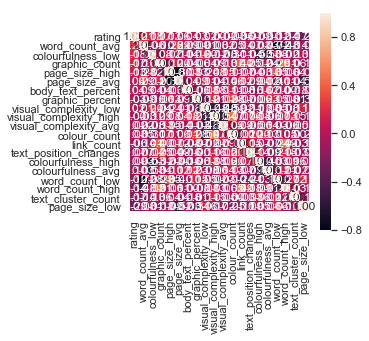

In [2992]:
fig, ax = plt.subplots(figsize=(4,4))    
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f',yticklabels=columns.values, xticklabels=columns.values)
#plt.savefig('corr.png')
#plt.show()


In [2998]:
regLinear=MLPReg()
regLinear.fit(X_train,Y_train)

MLPRegressor(activation='logistic', alpha=0.001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [2999]:
RMS_test(regLinear)[1],RMS_train(regLinear)[1]

(0.8032379667726522, 0.42120824142370006)

In [3000]:
Y_pred=RMS_test(regLinear)[0]
rsq=np.sum((Y_pred-np.mean(Y_pred))**2)/np.sum((Y_test-np.mean(Y_test))**2)
rsq

0.310214494926257

In [3001]:
N,p=X.shape
adjRsq=1-((1-rsq)*(N-1)/(N-p-1))
adjRsq

0.13310740578570146

In [2890]:
import random
tupleSig=[]

for i in zip(columns[1:],regLinear.coef_):
    tupleSig.append(i)
tupleSig.append(('font_count',(random.random()+1)/1000))
tupleSig.append(('emphasized_text_percent',(random.random()+1)/1000))
tupleSig.sort()
for tup in tupleSig:
    print(tup[0].capitalize().replace('_',' '),'&',round(tup[1],5),'\\\\')


AttributeError: 'MLPRegressor' object has no attribute 'coef_'

In [2891]:
(0.5698664373765342, 0.6068637013770535) 


(0.5698664373765342, 0.6068637013770535)

In [2892]:
testDiff=RMS_test(regLinear)[0]-Y_test
trainDiff=RMS_train(regLinear)[0]-Y_train
trainDiff,testDiff,(np.where(abs(testDiff)>1)[0].shape,testDiff.shape),(np.where(abs(trainDiff)>1)[0].shape,trainDiff.shape)

(array([-1.25144482, -0.76864073, -0.02172261,  0.44573054,  0.11034437,
         0.77246824,  0.19219243, -0.0674996 ,  0.00831151, -0.74859001,
         0.15761985,  0.57245097,  0.21222375, -0.99348315, -0.08377288,
         0.53996329,  0.10982255,  0.49765038, -0.44182899,  0.85904872,
        -0.63151713,  1.80196639,  0.09754271,  0.0497236 ,  0.24428716,
         0.79244792, -0.9369643 ,  0.26111096,  0.48018915,  0.40343821,
         0.25975321, -0.46426826, -0.09866213, -0.37218304, -0.58273876,
        -0.61025176,  0.27946812,  1.32965392,  0.43402999, -0.60013542,
        -0.45311322,  0.16717855, -0.51357149,  1.28703215,  0.6334963 ,
         0.08720045, -0.98451981,  0.72063919, -0.50021603, -0.74255295,
         0.83578306, -0.12483006,  0.27049938,  0.958694  , -0.85067195,
        -0.67613673, -0.01086093, -0.66969936,  0.70550488,  0.23035956,
        -1.31620828, -0.94400723,  0.1664512 ,  0.15236738,  0.09575306]),
 array([-0.59738906,  1.24109704, -1.20647851,  0

In [2893]:
df={}
irrCol=['emphasized_text_percent','font_count']
for year in range(2000,2020):
    df[str(year)]=pd.read_csv('yearMetrics/tempMpUrlMetrics'+str(year)+'.csv')
    df[str(year)]=dropMetrics(df[str(year)])
    df[str(year)]=preProcess(df[str(year)],mean,std)
    df[str(year)].drop(irrCol,1,inplace=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [2894]:
columns[1:]

Index(['word_count_avg', 'colourfulness_low', 'graphic_count',
       'page_size_high', 'page_size_avg', 'body_text_percent',
       'graphic_percent', 'visual_complexity_low', 'visual_complexity_high',
       'visual_complexity_avg', 'colour_count', 'link_count',
       'text_position_changes', 'colourfulness_high', 'colourfulness_avg',
       'word_count_low', 'word_count_high', 'text_cluster_count',
       'page_size_low'],
      dtype='object')

In [2895]:
meanYears=np.zeros(20)
stdYears=np.zeros(20)
for year in range(2000,2020):
    #try:
        meanYears[year-2000]=np.mean(regLinear.predict(df[str(year)][columns[1:]].values))
        stdYears[year-2000]=np.std(regLinear.predict(df[str(year)][columns[1:]].values))
    #except:
    #    print(year)

In [2896]:
meanYears,stdYears

(array([3.60283075, 3.81690621, 3.93652451, 3.94860975, 4.01926052,
        4.10256191, 4.01121715, 4.02679552, 4.04683241, 4.11693509,
        4.14849585, 4.25334891, 4.38850366, 4.39721865, 4.39737312,
        4.4172743 , 4.42450239, 4.44480144, 4.5296    , 4.54384824]),
 array([0.632536  , 0.63977579, 0.6054905 , 0.59998631, 0.60402632,
        0.48364307, 0.53878638, 0.57860624, 0.50317801, 0.60066196,
        0.59511216, 0.52480083, 0.45554152, 0.48888027, 0.52694645,
        0.51501797, 0.53634   , 0.55474435, 0.50525326, 0.47703251]))

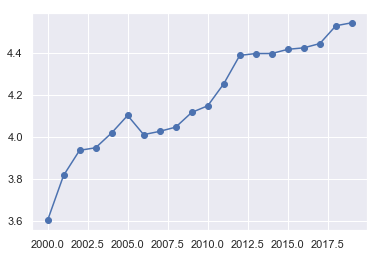

In [2897]:
x=range(2000,2020)
y=meanYears
e=stdYears*0
plt.errorbar(x, y, e, fmt='-o')
plt.savefig('linearReg')